First 5 Rows:
          id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1 

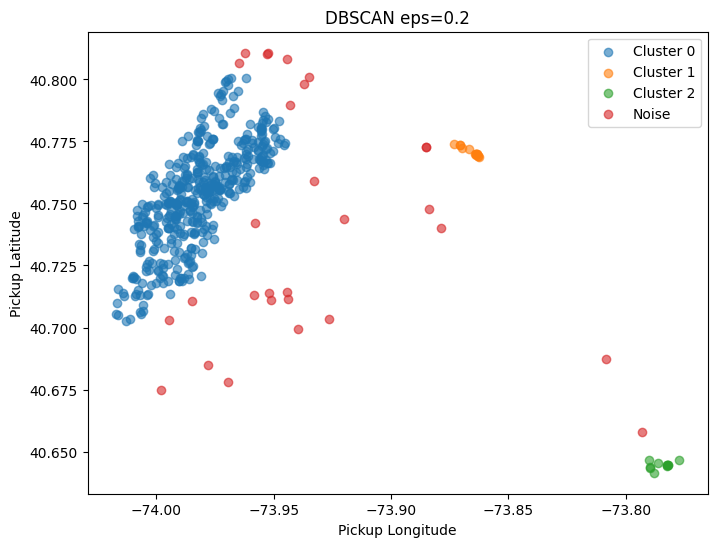

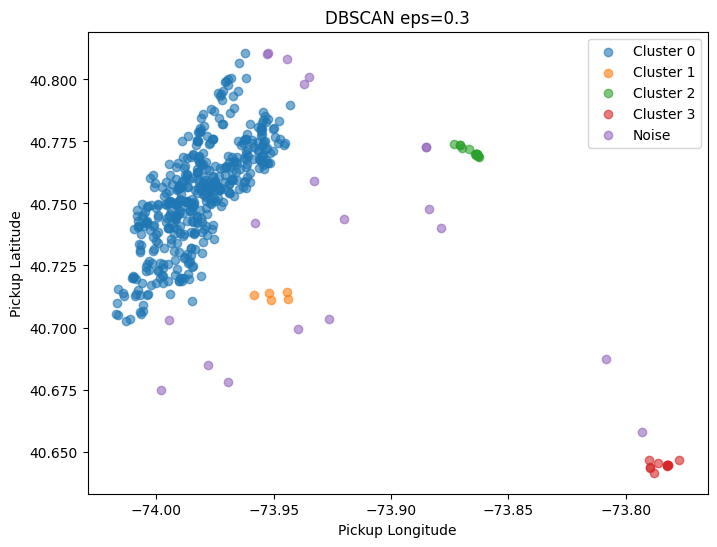

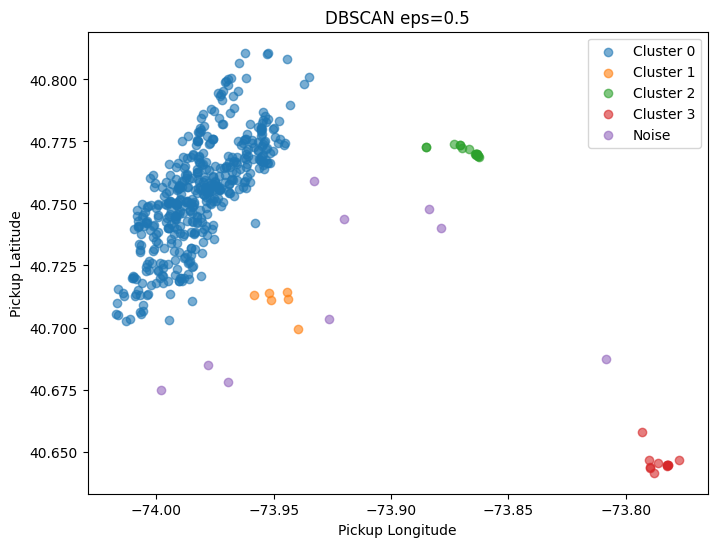


✅ Best eps value = 0.2


In [1]:
# ---------------------------------------------------------
# 1️⃣ Load Dataset
# ---------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Load dataset
df = pd.read_csv("NewYorkCityTaxiTripDuration.csv",nrows=500)

# Display first 5 rows
print("First 5 Rows:")
print(df.head())


# ---------------------------------------------------------
# 2️⃣ Feature Selection
# ---------------------------------------------------------
X = df[['pickup_latitude', 'pickup_longitude']]


# ---------------------------------------------------------
# 3️⃣ Data Preprocessing (Scaling)
# ---------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# ---------------------------------------------------------
# Function to Run DBSCAN and Evaluate
# ---------------------------------------------------------
def run_dbscan(eps_value):
    model = DBSCAN(eps=eps_value, min_samples=5)
    labels = model.fit_predict(X_scaled)

    # Number of clusters (excluding noise)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    # Number of noise points
    noise_points = list(labels).count(-1)

    # Noise ratio
    noise_ratio = noise_points / len(labels)

    return labels, n_clusters, noise_points, noise_ratio


# ---------------------------------------------------------
# 4️⃣ Experiment 1 (eps = 0.2)
# ---------------------------------------------------------
labels_1, clusters_1, noise_1, ratio_1 = run_dbscan(0.2)

# ---------------------------------------------------------
# 5️⃣ Experiment 2 (eps = 0.3)
# ---------------------------------------------------------
labels_2, clusters_2, noise_2, ratio_2 = run_dbscan(0.3)

# ---------------------------------------------------------
# 6️⃣ Experiment 3 (eps = 0.5)
# ---------------------------------------------------------
labels_3, clusters_3, noise_3, ratio_3 = run_dbscan(0.5)


# ---------------------------------------------------------
# 7️⃣ Cluster Evaluation
# ---------------------------------------------------------
print("\n--- Experiment 1 (eps=0.2) ---")
print("Clusters:", clusters_1)
print("Noise Points:", noise_1)
print("Noise Ratio:", round(ratio_1, 3))

print("\n--- Experiment 2 (eps=0.3) ---")
print("Clusters:", clusters_2)
print("Noise Points:", noise_2)
print("Noise Ratio:", round(ratio_2, 3))

print("\n--- Experiment 3 (eps=0.5) ---")
print("Clusters:", clusters_3)
print("Noise Points:", noise_3)
print("Noise Ratio:", round(ratio_3, 3))


# ---------------------------------------------------------
# 8️⃣ Silhouette Score (Remove Noise)
# ---------------------------------------------------------
def calculate_silhouette(labels, name):
    mask = labels != -1
    if len(set(labels[mask])) > 1:
        score = silhouette_score(X_scaled[mask], labels[mask])
        print(f"{name} Silhouette Score:", round(score, 3))
        return score
    else:
        print(f"{name} Silhouette Score: Not Applicable")
        return None

score_1 = calculate_silhouette(labels_1, "Experiment 1")
score_2 = calculate_silhouette(labels_2, "Experiment 2")
score_3 = calculate_silhouette(labels_3, "Experiment 3")


# ---------------------------------------------------------
# 9️⃣ Visualization
# ---------------------------------------------------------
def plot_clusters(labels, title):
    plt.figure(figsize=(8,6))
    
    unique_labels = set(labels)
    for label in unique_labels:
        if label == -1:
            color = 'black'
            label_name = 'Noise'
        else:
            color = None
            label_name = f'Cluster {label}'
        
        plt.scatter(
            X.iloc[labels == label]['pickup_longitude'],
            X.iloc[labels == label]['pickup_latitude'],
            label=label_name,
            alpha=0.6
        )
    
    plt.title(title)
    plt.xlabel("Pickup Longitude")
    plt.ylabel("Pickup Latitude")
    plt.legend()
    plt.show()

plot_clusters(labels_1, "DBSCAN eps=0.2")
plot_clusters(labels_2, "DBSCAN eps=0.3")
plot_clusters(labels_3, "DBSCAN eps=0.5")


# ---------------------------------------------------------
# 🔟 Best Model Selection
# ---------------------------------------------------------
results = [
    ("0.2", clusters_1, ratio_1, score_1),
    ("0.3", clusters_2, ratio_2, score_2),
    ("0.5", clusters_3, ratio_3, score_3),
]

# Choose best based on:
# 1. More clusters (but reasonable)
# 2. Lower noise ratio
# 3. Higher silhouette score

best = max(
    results,
    key=lambda x: (x[3] if x[3] is not None else -1)
)

print("\n✅ Best eps value =", best[0])